# Curso de Big Data

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Miércoles 4 de octubre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 1 deben estar dentro de esa carpeta.
- También deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/11nJY1Frgla45sTgsPiSeOZM9iBM-XRWh/edit?usp=sharing&ouid=105815768529474116534&rtpof=true&sd=true
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se  corregirán sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

In [1]:
#If not installed should run to install:
#!pip3 install requests
#!pip3 install pandas
#!pip3 install matplotlib

In [2]:
import requests  # Importa la biblioteca para realizar solicitudes HTTP.
import pandas as pd  # Importa la biblioteca Pandas para el manejo de datos.
import matplotlib.pyplot as plt  # Importa parcialmente la biblioteca Matplotlib para visualización de datos.

# A partir de este punto, puedes usar las funciones y clases de las bibliotecas importadas.

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [3]:
# Definir el término de búsqueda.
busqueda = 'salsa de soja'  
url = 'https://api.mercadolibre.com/sites/MLA/search?q='+busqueda  # Construye la URL de búsqueda

# Realizar la consulta de búsqueda para TODOS los resultados posibles
all_items = [] #creamos lista que contendra todos los resultados
offset = 0 #la busqueda se realiza de a 50 items x pagina, empezamos sin ningun offset
while True: #Loop que se mantiene siempre verdadero hasta el break
  response = requests.get(url+f'&offset={offset}')  # Hace la consulta GET y guarda la respuesta.
  items = response.json()['results'] # Parsear la respuesta JSON y obtiene los resultados de la búsqueda
  all_items.extend(items) #agregamos los items de esta busqueda a los resultados completos
  offset += 50 #ajustamos el offset para la siguiente busqueda
  
  if len(items)<49:
    break  # Terminar si son menos de 50 resultados (ultima pagina)

#Crea la listas correspondientes:
titles = [item['title'] for item in all_items]  # Para títulos para cada producto
prices = [item['price'] for item in all_items]  # Para precios para cada producto
permalinks = [item['permalink'] for item in all_items]  # Para enlaces permanentes para cada producto

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [11]:
# Crear el DataFrame con títulos, precios y enlaces
# (incluimos adicionalmente el 'link' y 'titulos' para verificar que la busqueda tenga sentido)
df = pd.DataFrame({'Title': titles, 'Price': prices, 'Link': permalinks})

#[Extra] Guardar los resultados en un archivo .csv
df.to_csv(f'./output/[Tabla] Busqueda--{busqueda.title()}.png')

# Calcular estadísticas de precios
average_price = df['Price'].mean()  # Precio promedio
min_price = df['Price'].min()        # Precio mínimo
max_price = df['Price'].max()        # Precio máximo

# Imprimir los resultados
print(f'Promedio: ${round(average_price, 2)}') #redondeamos a los decimales utiles
print(f'Mínimo: ${min_price}')
print(f'Máximo: ${max_price}')


Promedio: $6028.25
Mínimo: $711.9
Máximo: $34695.0


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

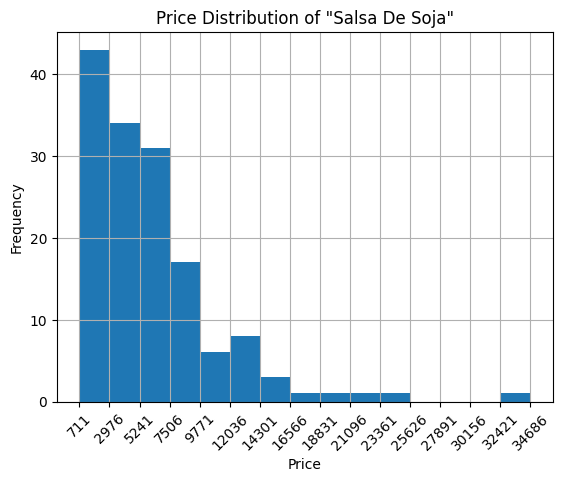

In [12]:
df.hist(column='Price', bins=15) #15 intervalos para el histograma
plt.title(f'Price Distribution of "{busqueda.title()}"') #Construimos el titulo a partir de la busqueda realizada

plt.ylabel('Frequency') #subtitulo eje Y
plt.xlabel('Price') #subtitulo eje X

plt.xticks(range(int(min_price), int(max_price), int((max_price-min_price)/15)))  #Ajustamos el eje x para ver mejor los rangos del histograma
plt.xticks(rotation=45)#rotamos las labels del eje para mejor lectura

plt.savefig(f'./output/[Histograma] Busqueda--{busqueda.title()}.png', format='png') #guardamos el histograma bajo el parametro de busqueda
plt.show() # Mostrar el gráfico

Arriba observamos el histograma en el que tenemos la distribución de los precios del producto "salsa de soja" y su respectiva frecuencia. Observamos que la mayoría de los productos tiene un precio menor a los 10000 ARS. Observamos que hay un outlier que es el producto con el precio más alto de 75027 ARS y otros dos con precos entre los 45000 ARS y 55000 ARS. 

Notemos que tanta variedad en los precios puede deberse a la variedad de tipos de productos que puede haber dentro de salsa de soja. Ya sea por que hay de distintos tamaños, el origen (si es importado o nacional) o la cantidad de unidades (si es una unidad o un pack). 

Notar que una decisión arbitraria que tuvimos que tomar para la construcción del histograma fue la eleccion de la cantidad de "bins". Elegimos un numero de bandas que permita tener un histograma lo más informativo posible. Si eligiesemos un ancho de banda extremadamente grande, el histograma no sería informativo ya que todas las realizaciones caerían en el mismo intervalo y no podríamos detercar outliers. En el otro extremo, si eligiesemos un ancho de banda extremadamente chico, tendríamos un histograma muy ruidoso y tampoco podríamos detectar fácilmente outliers. Alterando los parámetros y buscando balancear visualmente, elegimos bins $= 15$. 